In [2]:
from tqdm import tqdm
from sklearn.model_selection import LeaveOneOut
from IPython.utils import io
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Activation

In [52]:
features = pd.read_csv('Dataset/gastrointestinal_colonoscopy_lesions_dataset.csv')
features = features.T
class_label = pd.Series(features.index)
features.index = range(features.shape[0])
classes = np.zeros((features.shape[0], 3))
for i in range(classes.shape[0]):
    if 'adenoma' in class_label[i]:
        classes[i,0] = 1.0
        class_label[i] = 0
    elif 'serrated' in class_label[i]:
        classes[i,2] = 1.0
        class_label[i] = 2
    else:
        classes[i,1] = 1.0
        class_label[i] = 1
classes = {'adenoma': classes[:,0], 'hyperplasic': classes[:,1], 'serrated': classes[:,2]}
classes = pd.DataFrame(classes)
class_label = class_label.astype('int')

In [4]:
for col in features.columns:
    if features[col].abs().max()==0:
        continue
    features[col] = (features[col] - features[col].mean())/features[col].abs().max()

In [8]:
model = Sequential([
    
    InputLayer(input_shape=(features.shape[1])),
    
    Dense(7, activation='sigmoid'),
    
    Dense(5, activation='sigmoid'),
    
    Dense(3, activation='relu')
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )
model.summary()
model.save_weights('model_weights/initial_weights_colonoscopy')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 4907      
                                                                 
 dense_4 (Dense)             (None, 5)                 40        
                                                                 
 dense_5 (Dense)             (None, 3)                 18        
                                                                 
Total params: 4,965
Trainable params: 4,965
Non-trainable params: 0
_________________________________________________________________


In [6]:
acc = 0
j = 0
for train_index, test_index in LeaveOneOut().split(features):
    x_train, x_test = features.iloc[train_index,:], features.iloc[test_index,:]
    y_train, y_test = classes.iloc[train_index,:], classes.iloc[test_index,:]
    model.load_weights('model_weights/initial_weights_colonoscopy')
    with io.capture_output() as captured:
        model.fit(x_train, y_train, epochs=500)
    acc += model.evaluate(x_test, y_test)[1]
    j+=1

1/1 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000


KeyboardInterrupt: 

In [17]:
acc/j

0.743421052631579

In [9]:
model.fit(features, classes, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6567 - accuracy: 0.5263
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.5263
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6052 - accuracy: 0.5263
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.5263
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5786 - accuracy: 0.5263
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5694 - accuracy: 0.5263
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.5263
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5578 - accuracy: 0.5263
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5528 - accuracy: 0.5263
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5485 - accuracy: 0.5263
Epoch 11/500
5/5 [===========

5/5 [==============================] - 0s 3ms/step - loss: 0.3929 - accuracy: 0.7697
Epoch 85/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.7763
Epoch 86/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.7829
Epoch 87/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.7895
Epoch 88/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.7895
Epoch 89/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3833 - accuracy: 0.7961
Epoch 90/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.8158
Epoch 91/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8092
Epoch 92/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8092
Epoch 93/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8158
Epoch 94/500
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9408
Epoch 168/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9408
Epoch 169/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2078 - accuracy: 0.9408
Epoch 170/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2058 - accuracy: 0.9408
Epoch 171/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9408
Epoch 172/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9408
Epoch 173/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1998 - accuracy: 0.9408
Epoch 174/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1978 - accuracy: 0.9408
Epoch 175/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9474
Epoch 176/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1939 - accuracy: 0.9474
Epoch 177/500
5/5 [=====

5/5 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 1.0000
Epoch 250/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 1.0000
Epoch 251/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 1.0000
Epoch 252/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 1.0000
Epoch 253/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0706 - accuracy: 1.0000
Epoch 254/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 1.0000
Epoch 255/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 1.0000
Epoch 256/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 1.0000
Epoch 257/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 1.0000
Epoch 258/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 1.0000
Epoch 259/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.0157 - accuracy: 1.0000
Epoch 332/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 333/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 1.0000
Epoch 334/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0147 - accuracy: 1.0000
Epoch 335/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0144 - accuracy: 1.0000
Epoch 336/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 337/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 338/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 1.0000
Epoch 339/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 1.0000
Epoch 340/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 1.0000
Epoch 341/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 414/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 415/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 416/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 417/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 418/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 419/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 420/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 421/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 422/500
5/5 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 423/500
5/5 [=====

5/5 [==============================] - 0s 3ms/step - loss: 8.0347e-05 - accuracy: 1.0000
Epoch 494/500
5/5 [==============================] - 0s 3ms/step - loss: 8.5282e-05 - accuracy: 1.0000
Epoch 495/500
5/5 [==============================] - 0s 2ms/step - loss: 6.6731e-05 - accuracy: 1.0000
Epoch 496/500
5/5 [==============================] - 0s 2ms/step - loss: 5.8989e-05 - accuracy: 1.0000
Epoch 497/500
5/5 [==============================] - 0s 3ms/step - loss: 5.9073e-05 - accuracy: 1.0000
Epoch 498/500
5/5 [==============================] - 0s 3ms/step - loss: 4.7544e-05 - accuracy: 1.0000
Epoch 499/500
5/5 [==============================] - 0s 3ms/step - loss: 4.7548e-05 - accuracy: 1.0000
Epoch 500/500
5/5 [==============================] - 0s 3ms/step - loss: 3.8832e-05 - accuracy: 1.0000


In [10]:
grad_sum = 0
for col_name in tqdm(features.columns):
    pointFrame = features.loc[:, features.columns != col_name]
    for i in features[col_name]:
        pointFrame[col_name] = i*np.ones(len(features.index))
        points = tf.Variable(pointFrame, dtype='float')
        with tf.GradientTape() as tape:
            pred = model(points, training=False)
        grads = tape.gradient(pred, points)
        grad_sum += np.abs(grads.numpy())
saliency_order = np.argsort(-np.sum(np.abs(grad_sum), 0))

100%|██████████| 700/700 [06:37<00:00,  1.76it/s]


In [20]:
# features[saliency_order]

,521,555,464,146,459,578,466,567,102,476,...,580,512,550,545,509,571,546,455,547,0
0,0.019545,0.006736,0.156682,0.014037,-0.031571,0.004495,0.037353,-0.002092,0.034154,-0.031988,...,0.000045,-0.006884,0.025033,0.020956,-0.016513,-0.000891,0.017661,-0.008144,0.019453,0.250000
1,0.019545,0.006736,-0.071990,0.009191,-0.031571,0.004495,0.278855,-0.002092,0.018739,-0.068907,...,0.000045,-0.006884,0.025033,0.020956,-0.016513,-0.000891,0.017661,-0.008144,0.019453,0.250000
2,0.000482,0.010090,-0.131291,0.008758,-0.031571,0.014783,0.171833,0.004874,-0.043517,-0.034020,...,0.007166,-0.019150,0.004244,0.007180,0.021233,0.008760,-0.007271,0.229704,0.012418,0.250000
3,0.000482,0.010090,-0.140440,0.066090,-0.031571,0.014783,-0.195110,0.004874,-0.021684,-0.027042,...,0.007166,-0.019150,0.004244,0.007180,0.021233,0.008760,-0.007271,-0.008144,0.012418,0.250000
4,-0.004381,-0.003327,-0.029781,-0.104275,-0.031571,0.006089,0.284429,0.002363,-0.049273,-0.013611,...,0.008576,0.000245,0.029734,0.012956,-0.024416,0.011717,0.021297,-0.008144,0.018683,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.089982,0.009065,0.063551,-0.029268,-0.031571,-0.004344,0.280373,-0.014891,-0.066011,-0.059386,...,0.002724,0.046772,0.000484,0.018410,0.051588,-0.016223,0.006035,-0.008144,0.006751,-0.083333
148,0.019351,0.007854,-0.040653,-0.007182,0.586617,-0.001011,0.193040,0.017754,0.043483,-0.064848,...,-0.005173,0.005516,0.001316,0.009247,-0.041244,0.012807,0.009186,-0.008144,0.009858,-0.083333
149,0.019351,0.007854,-0.026035,0.030283,-0.031571,-0.001011,-0.075700,0.017754,0.175669,-0.054389,...,-0.005173,0.005516,0.001316,0.009247,-0.041244,0.012807,0.009186,-0.008144,0.009858,-0.083333
150,0.004470,-0.010036,-0.140440,-0.007820,-0.031571,0.011668,-0.195110,0.001634,0.025620,-0.055482,...,0.009916,0.063362,-0.037031,-0.043478,0.039641,0.009538,-0.050214,-0.008144,-0.044736,-0.083333


[]

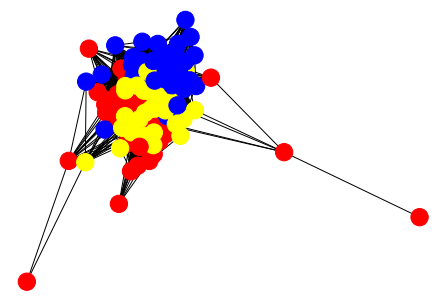

In [16]:
num_features = 100
salient_features = features.iloc[:,saliency_order[0:num_features]]
A = np.zeros((features.shape[0], features.shape[0]))
for i in features.index:
    for j in range(i):
        A[i,j] = np.linalg.norm(salient_features.iloc[i,:] - salient_features.iloc[j,:])
A = A + np.transpose(A)
# p = np.median(A).astype('int')
# print(np.max(A))
p = 1.6
A = (A < p)
A = A - np.eye(A.shape[0])
rows, cols = np.where(A==1)
edges = zip(rows.tolist(), cols.tolist())
G = nx.Graph()
G.add_edges_from(edges, node_size=1)
color_map = np.array([])
for node in G:
    if (class_label[node]==0):
        color_map = np.append(color_map, 'red')
    elif (class_label[node]==1):
        color_map = np.append(color_map, 'blue')
    else:
        color_map = np.append(color_map, 'yellow')
nx.draw(G, node_color=color_map)
plt.plot()

In [13]:
print(p)

1


In [56]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(salient_features)
print(kmeans.inertia_)
# print(kmeans.cluster_centers_)
# print(kmeans.n_iter_)
predicted_label = kmeans.labels_
print(predicted_label)
print(classes)

141.61293299248968
[2 1 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 2 2 1 1 1 2 1 2 2 2 1 2 1 2 1 1 1 2 2 2
 1 2 1 2 2 2 1 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 2 2 1 2 1 2 2 2 1 2 2 2 0 2 1
 2 2 2 1 2 1 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 0 1 2 0 1 2 1 2 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1]
     adenoma  hyperplasic  serrated
0        1.0          0.0       0.0
1        1.0          0.0       0.0
2        1.0          0.0       0.0
3        1.0          0.0       0.0
4        1.0          0.0       0.0
..       ...          ...       ...
147      0.0          0.0       1.0
148      0.0          0.0       1.0
149      0.0          0.0       1.0
150      0.0          0.0       1.0
151      0.0          0.0       1.0

[152 rows x 3 columns]


In [58]:
compared_classes = np.array([])
for i in classes.iterrows():
    if i[1]['adenoma']==1:
        compared_classes = np.append(compared_classes, 2)
    elif i[1]['hyperplasic']==1:
        compared_classes = np.append(compared_classes, 1)
    else:
        compared_classes = np.append(compared_classes, 0)
print(np.count_nonzero(compared_classes!=predicted_label)/len(predicted_label))
# print(i[1]['adenoma'])

0.6578947368421053
